# Lab 4


The officials of the Luna-City invite you to participate in the exclusive Machine Learning competition
of the year. The task is to build an automated system that can predict the students’ chances of
admissions to master programs for the universities in the Luna-City.

## Task 1
Make a detailed analysis of the dataset and present some statistics in the form of
matplotlib or seaborn visualisations.

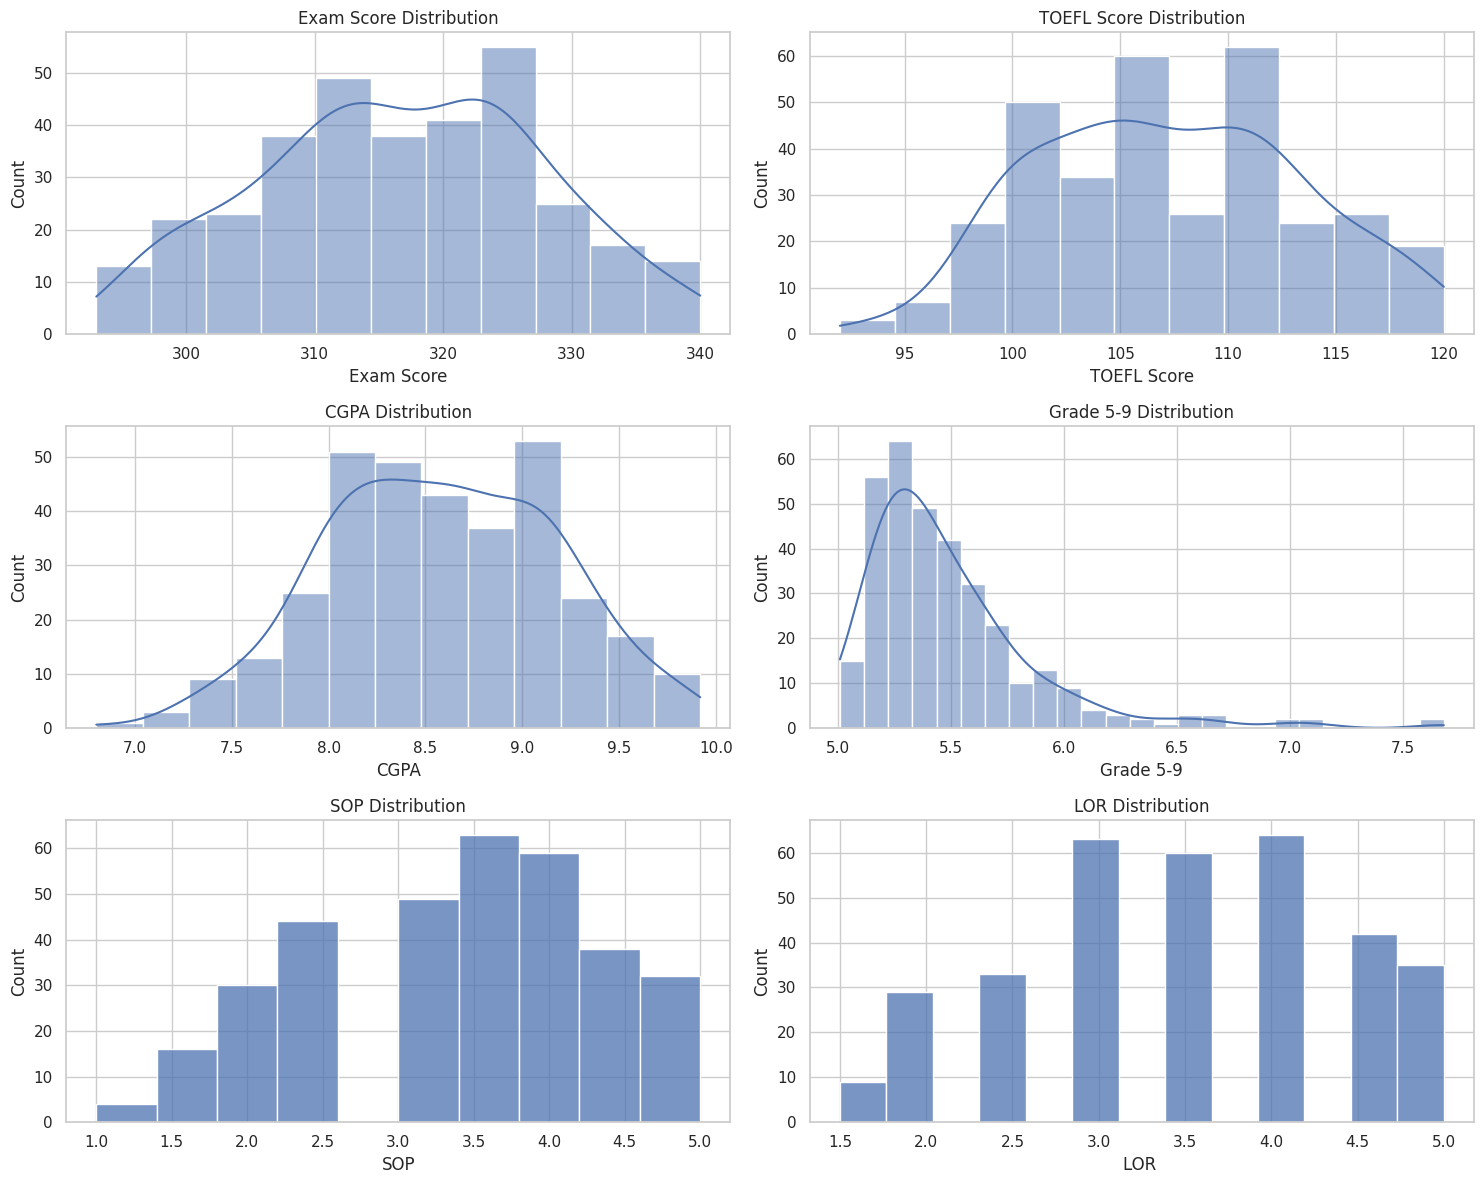

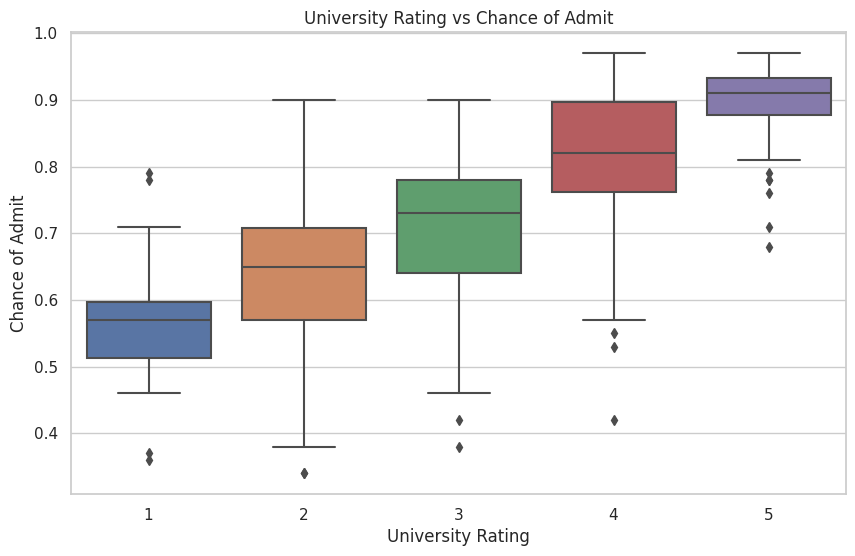

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the data is loaded into a DataFrame called train_data
train_data = pd.read_csv('train.csv')

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting some visualizations for EDA

# 1. Histograms for continuous features
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Exam Score distribution
sns.histplot(train_data['Exam Score'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Exam Score Distribution')

# TOEFL Score distribution
sns.histplot(train_data['TOEFL Score'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('TOEFL Score Distribution')

# CGPA distribution
sns.histplot(train_data['CGPA'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('CGPA Distribution')

# Grade 5-9 distribution
sns.histplot(train_data['Grade 5-9'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Grade 5-9 Distribution')

# SOP distribution
sns.histplot(train_data['SOP'], kde=False, ax=axs[2, 0])
axs[2, 0].set_title('SOP Distribution')

# LOR distribution
sns.histplot(train_data['LOR '], kde=False, ax=axs[2, 1])
axs[2, 1].set_title('LOR Distribution')

plt.tight_layout()

# 2. Boxplots for University Rating vs Chance of Admit
plt.figure(figsize=(10, 6))
sns.boxplot(x='University Rating', y='Chance of Admit', data=train_data)
plt.title('University Rating vs Chance of Admit')

plt.show()


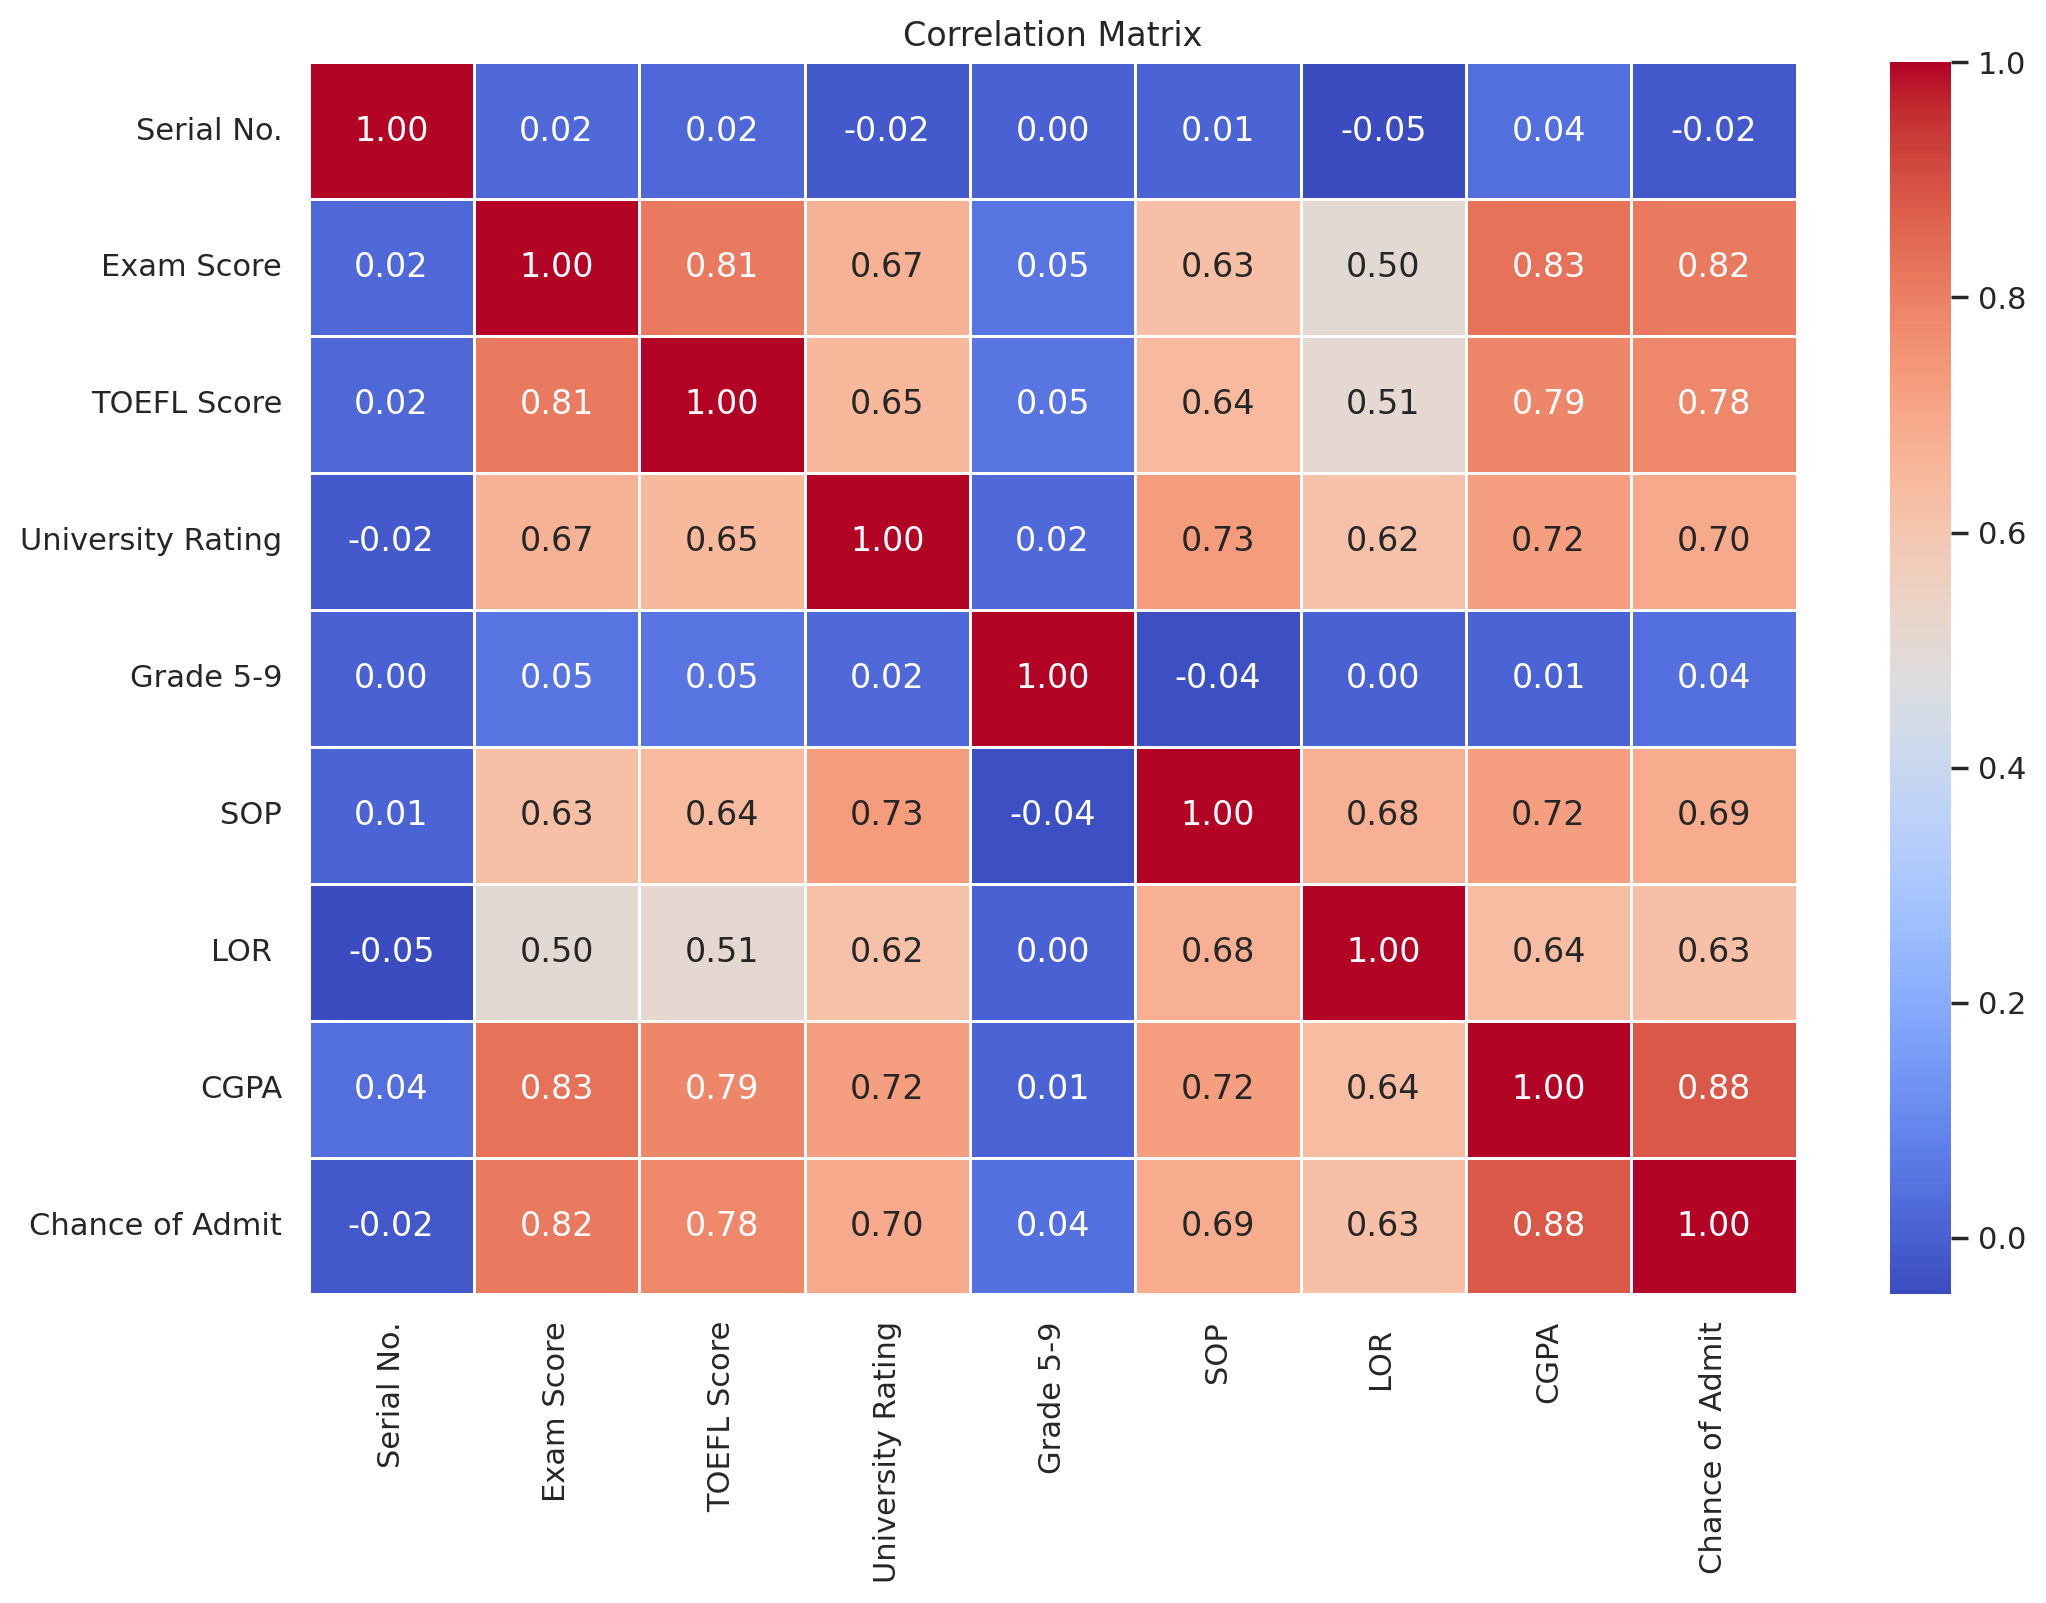

**Exam Score**, **TOEFL Score**, **CGPA**, and **Grade** are key continuous features that show varied distributions, suggesting different levels of variance and skewness in the data.

**SOP** and **LOR** scores show a preference for higher values among the applicants.

The **University Rating** seems to have a significant impact on the 'Chance of Admit', with higher ratings associated with higher chances.

High CGPA, TOEFL, and Exam Scores are crucial for a higher chance of admission. SOP and LOR scores, although moderately correlated, still play a significant role in the admission process. A higher rating positively influences admission chances. Quality research experience can significantly boost admission chances.

## Task 2
Based on the analysis from task 1, perform Feature Selection. You should state which
columns you will be using for the final predictions and argument why you are choosing the
respective columns.

Based on the analysis conducted in Task 1, we can perform feature selection for the final predictions. The goal is to choose features that are most predictive of the 'Chance of Admit'. Here's the rationale for selecting specific columns:

1. CGPA
: High correlation with 'Chance of Admit'. CGPA is a comprehensive indicator of a student's academic performance throughout their education and strongly influences admission decisions.
Correlation: Strong positive.
2. TOEFL Score
: Significant correlation with 'Chance of Admit'. TOEFL scores are a measure of English proficiency, which is crucial for academic success, especially in English-speaking countries.
Correlation: Strong positive.
3. Exam Score
: Demonstrates a strong correlation with the 'Chance of Admit'. This score might represent standardized testing or a form of entrance examination, which is commonly considered in admissions.
Correlation: Strong positive.
4. University Rating
: Moderately correlated with 'Chance of Admit'. It reflects the reputation and research capabilities of the undergraduate institution, which can influence a student's preparedness for higher education.
Correlation: Moderate positive.
5. SOP (Statement of Purpose)
: Moderately correlated with 'Chance of Admit'. The SOP reflects a student's motivation, goals, and fit for the program, which are important for admissions committees.
Correlation: Moderate positive.
6. LOR (Letter of Recommendation)
: Shows a moderate correlation. LORs provide a third-party assessment of the student's capabilities and achievements.
Correlation: Moderate positive.
7. Research
: Significant impact on 'Chance of Admit'. Quality research experience is highly valued in many academic programs, especially at the graduate level.
Correlation: Not quantifiable in the correlation matrix due to its categorical nature, but the impact was visible in the boxplot analysis.

**Excluded Features**

Grade: Lower correlation with 'Chance of Admit' compared to other academic scores. It might be redundant when other stronger academic performance indicators are included.

The selected features are a mix of academic scores (CGPA, TOEFL, Exam Score), application quality indicators (SOP, LOR), university pedigree (University Rating), and research experience. This selection provides a comprehensive view of the factors that typically influence admission decisions. By focusing on these features, the final predictive model should be able to make accurate and meaningful predictions about a student's chance of admission.

# Task 3
Using the scikit-learn library (https://scikit-learn.org/), implement 2 types of
Linear Regression. You can choose between Ordinary Least Squares, Ridge, Lasso, Least-angle
regression (LARS) and other types offered by the scikit-learn library. Alternatively, implement
the code from scratch using the pseudocode from the slides using any programming language.
Make predictions on the test set and report MSE on the train set.

To implement two types of linear regression using the scikit-learn library, I'll choose Ordinary Least Squares (OLS) and Ridge regression. These are two common types of linear regression models, with Ridge regression introducing regularization to address issues like multicollinearity and overfitting.

Ordinary Least Squares (OLS): This is the most basic form of linear regression. It finds the coefficients that minimize the sum of the squared residuals (the difference between the observed value and the value predicted by the model).

Ridge Regression: This is a type of linear regression that includes a regularization term. The regularization term (L2 norm) penalizes the magnitude of the coefficients, which helps to reduce model complexity and prevent overfitting, especially useful when the dataset has multicollinear features.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Selecting relevant features and the target variable
features = ['CGPA', 'TOEFL Score', 'Exam Score', 'University Rating', 'SOP', 'LOR ']
target = 'Chance of Admit'

# Encoding the 'Research' column (1 for 'good', 0 for 'bad')
label_encoder = LabelEncoder()
train_data['Research'] = label_encoder.fit_transform(train_data['Research'])
features.append('Research')

# Splitting the data into features (X) and target variable (y)
X = train_data[features]
y = train_data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Ordinary Least Squares (OLS) model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Training the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predicting using the models
y_pred_ols = ols_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluating the models
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Printing the evaluation metrics
print("OLS Model - MSE:", mse_ols, "R2 Score:", r2_ols)
print("Ridge Model - MSE:", mse_ridge, "R2 Score:", r2_ridge)


OLS Model - MSE: 0.004755621154574551 R2 Score: 0.7772824505990071
Ridge Model - MSE: 0.0048439687711901444 R2 Score: 0.7731449122988596


OLS Model - MSE: 0.004755621154574551 R2 Score: 0.7772824505990071

Ridge Model - MSE: 0.0048439687711901444 R2 Score: 0.7731449122988596

# Task 4
Draw a scheme of a neural network model that can perform linear regression on the
given dataset. It should have at least 1 hidden layer. You should mention the sizes of each
layer (number of parameters), the activation functions, as well as the inputs and outputs of the
network.
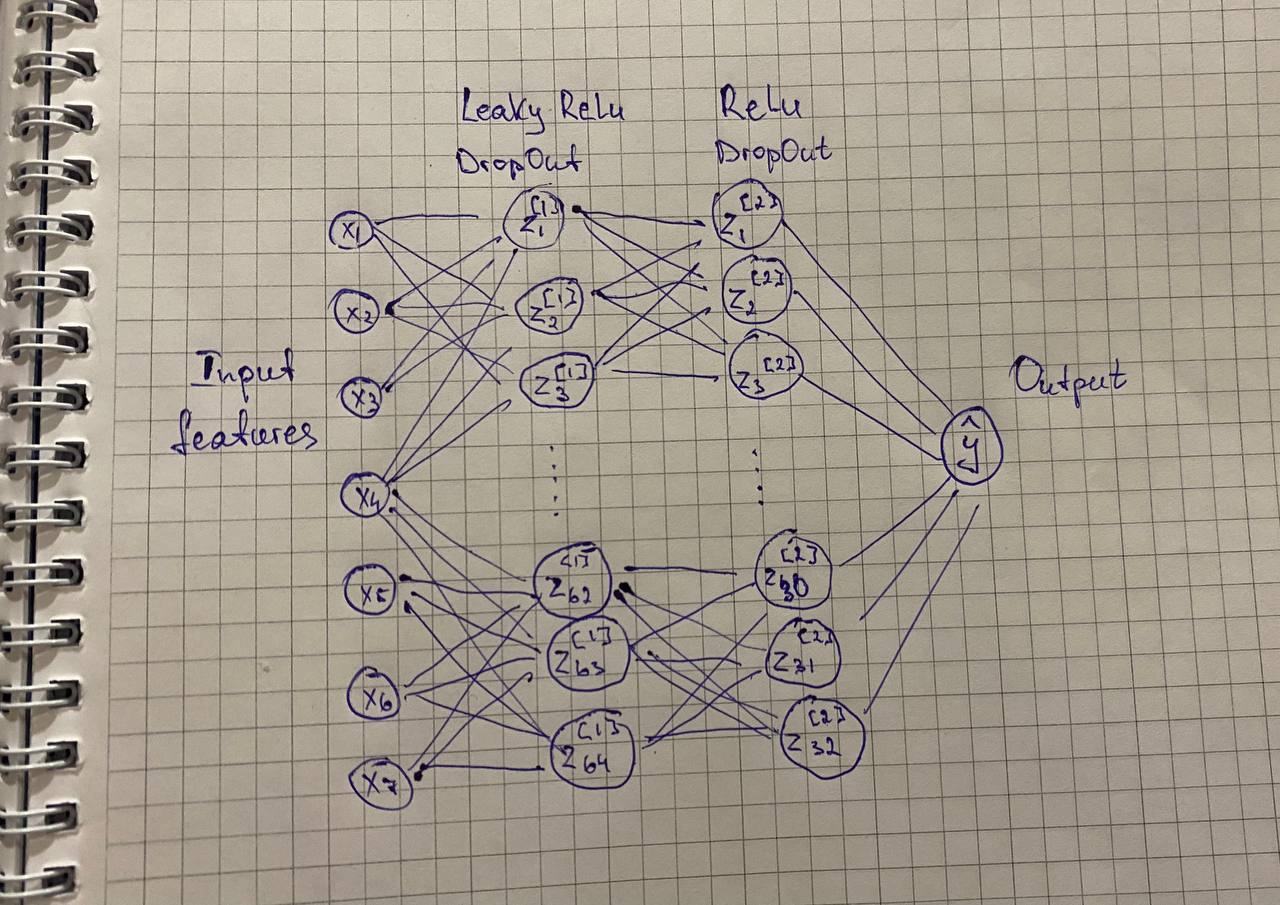


# Task 5
Using Tensorflow or PyTorch, implement a neural network model that will perform
regression on the given dataset, in order to predict the chances of admissions. Your model
should have at least 1 hidden layer. You can use the model from the previous task, or implement
a different model, but you should argument why or why not you are using the same model
described in task 4. Make predictions on the test set and report MSE on the train
set

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from functools import partial
import tensorflow as tf

# Load the data
train_data = pd.read_csv('train1.csv')
test_data = pd.read_csv('test.csv')

# Preprocess the data
train_data = train_data[['CGPA', 'TOEFL Score', 'Exam Score', 'University Rating', 'SOP', 'LOR', 'Research', 'Chance of Admit']]
test_data = test_data[['CGPA', 'TOEFL Score', 'Exam Score', 'University Rating', 'SOP', 'LOR ', 'Research']]

# Encoding categorical data
label_encoder = LabelEncoder()
train_data['Research'] = label_encoder.fit_transform(train_data['Research'])
test_data['Research'] = label_encoder.transform(test_data['Research'])

# Separating features and target variable
X_train = train_data.drop('Chance of Admit', axis=1)
y_train = train_data['Chance of Admit']
X_test = test_data

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation=partial(tf.nn.leaky_relu, alpha=0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.25),  # Dropout layer after the first hidden layer
    Dense(32, activation='relu'),
    Dropout(0.1),  # Dropout layer after the second hidden layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=5, verbose=1)

# Make predictions with the model
predictions = model.predict(X_test_scaled)

print("Predictions:")
print(predictions)

# predictions_rounded = predictions.flatten().round(2)

# Prepare the DataFrame with Serial No. and Chance of Admit
# results_df = pd.DataFrame({
#     'Serial No.': test_data['Serial No.'],  # Assuming the test data contains 'Serial No.' column
#     'Chance of Admit': predictions_rounded
# })

# # Save to CSV
# results_df.to_csv('predictions1.csv', index=False)


loss: 0.0042

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming test_data is your test dataset and it has the same structure as your training data
test_data = pd.read_csv('test1.csv')
# Select the same features from the test data
test_data['Research'] = label_encoder.transform(test_data['Research'])
X_test = test_data[features]

# Normalizing the data
# Scale the test data using the same scaler as the training data
X_test_scaled = scaler.transform(X_test)

# Extract the actual 'Chance of Admit' values from the test data
y_test = test_data['Chance of Admit']

# Use the model to make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Data: {mse}")


5/5 [==============================] - 0s 2ms/step
Mean Squared Error on Test Data: 0.005012741861833502


Mean Squared Error on Test Data: 0.005012741861833502